**Concept** - Decide a percentile value and all the dataset above and below this percentile value should be treated as outliers. Eg. If you select a percentile value 1 percentile then all the values less than 1 percentile and all the values above 99 percentile will be treated as outliers.



---



**Handling outliers** - Trimming and Capping.

Capping using percentile method is called Winsorization technique.


---



In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('weight-height.csv')
df.sample(5)

,Gender,Height,Weight
2793,Male,67.737146,166.352335
9174,Female,67.119764,156.538354
8768,Female,67.599586,159.969308
5851,Female,60.143869,107.166051
2498,Male,68.720529,195.670171


In [6]:
df.shape

(10000, 3)

In [26]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


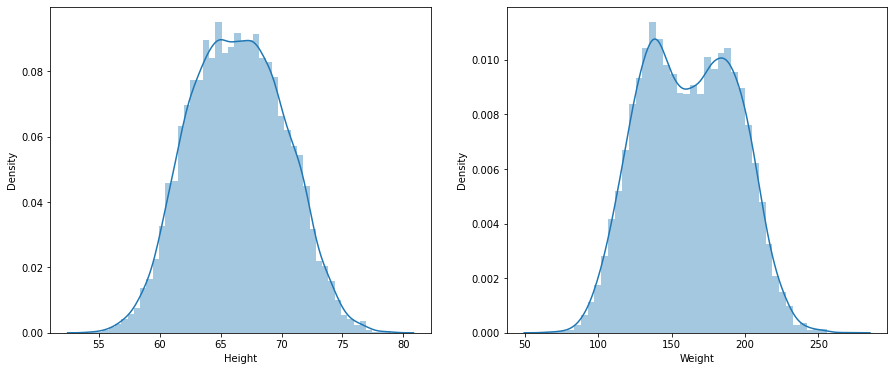

In [25]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.distplot(df['Height'])

plt.subplot(1,2,2)
sns.distplot(df['Weight'])


plt.show()

**Outlier Detection - Using boxplot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


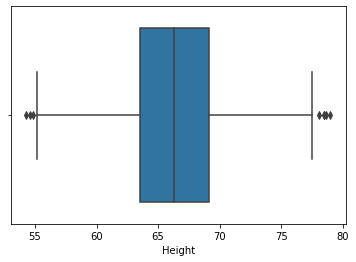

In [32]:
# We can see there are a few outliers

sns.boxplot(df['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


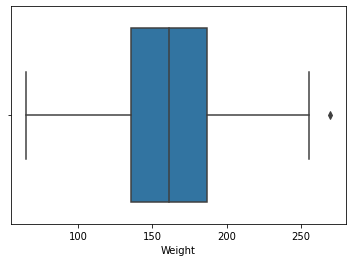

In [33]:
# We can see there are a almost no outliers in Weight. Hence we will only work on Height column for outlier detection and treatment in this notebook

sns.boxplot(df['Weight'])

In [35]:
# We are taking percentile value as 1 percentile that is all the values less than 1 percentile and more than 99 percentile will be called outlier

upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

print("Upper limit = : ", upper_limit)
print("Lower limit = : ", lower_limit)

Upper limit = :  74.7857900583366
Lower limit = :  58.13441158671655


**Outlier Treatment - Trimming**

In [52]:
# Creating new dataframe which does not have outliers

df_new_trim = df[(df['Height'] >= lower_limit) & (df['Height'] <= upper_limit)]

In [55]:
# You can see shape changed from 1000 to 9800 i.e. 200 datapoints have been identified as outliers in our case 
df_new_trim.shape

(9800, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


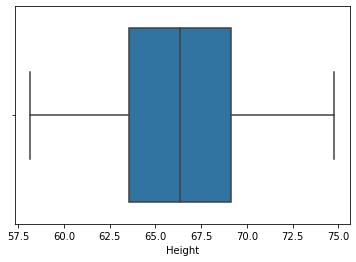

In [56]:
# We can see there are no outlier now in Height Column after trimming 

sns.boxplot(df_new_trim['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


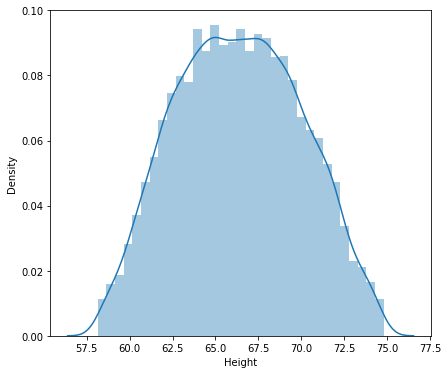

In [58]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.distplot(df_new_trim['Height'])

plt.show()

**Outlier Treatment - Capping - This technique is also called *Winsorization*** 

In [63]:
df['Height']= np.where(df['Height'] >= upper_limit, upper_limit, np.where(df['Height'] < lower_limit, lower_limit, df['Height']))


In [64]:
df.sample(5)

,Gender,Height,Weight
1117,Male,73.967723,227.022347
4557,Male,65.102935,159.104754
3866,Male,67.342141,197.532281
95,Male,65.117485,165.717112
8499,Female,66.042488,133.944361


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


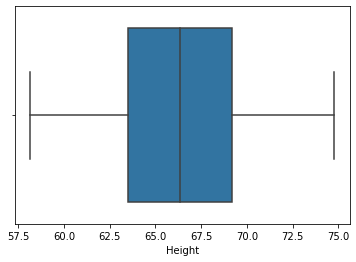

In [66]:
# We can see there are no outlier now in Height Column after capping 

sns.boxplot(df['Height'])

In [67]:
df.shape

(10000, 3)

In [70]:
# You can see max and min value have changed to upper_limit and lower_limit respectively because we applied capping

df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.366281,161.440357
std,3.795717,32.108439
min,58.134412,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,74.785790,269.989699


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


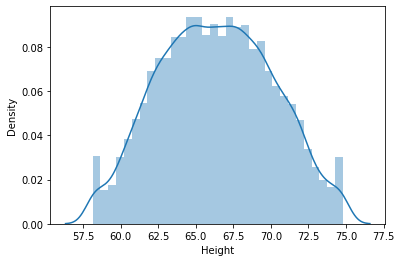

In [71]:
# You can notice that at both the ends the curve has gone a little up due to capping (i.e. due to bringing more datapoints (outliers) at that boundaries)
sns.distplot(df['Height'])